# EXPLORATORY DATA ANALYSIS COURSE PROJECT

## 4TH SEM E DIV     Team No: 14     
## PROJECT TITLE: Twitter and Circadian Rhythms
## PROBLEM STATEMENT :To analyze the sleep cycle of specific categories of people based on tweets made in weekdays, weekends and different months.

### Team Memebers:
### Nikhil Pandit - 549
### Prateek R B- 550
### Shreevatsa Patil - 551
### Kartik Patil- 562

In [3]:
#Reading the data set and importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
df = pd.read_csv("Twitter_data.csv") 
df.head()

,Name,Age,Location,lastday_tweet(time),nxtday_tweet(time),Screen time,Time btw,day,Profession,Month
0,MCKAY,59,NaN,20.35.19,7.35.24,1.40,9.5,Weekend,Retired,Jul
1,MCCLAIN,22,NaN,23.36.55,9.11.10,2.50,8.0,Weekend,Athlete,Nov
2,FORD,23,NaN,21.05.27,6.50.01,4.25,6.0,Weekdays,Streamer,Apr
3,SAVAGE,28,NaN,23.33.43,8.27.54,3.25,7.5,Weekdays,Cab Driver,Nov
4,NAVA,56,NaN,20.33.13,6.44.00,2.80,8.0,Weekdays,Retired,Nov


In [4]:
#data Preprocessing
#Data cleaning
#find the missing values
#finding percentage
percent_missing = df.isnull().sum() * 100 / len(df) 
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                             column_name  percent_missing
Name                                Name         0.000000
Age                                  Age         0.000000
Location                        Location        83.475480
lastday_tweet(time)  lastday_tweet(time)         0.000000
nxtday_tweet(time)    nxtday_tweet(time)         0.319829
Screen time                  Screen time         0.000000
Time btw                        Time btw         0.000000
day                                  day         0.000000
Profession                    Profession         0.000000
Month                              Month         0.000000


In [5]:
#As location has maximum null values we will drop that
df.drop(labels=['Location'],axis=1,inplace=True)
#AS we do not require lastday and next day tweet and also name we will drop that column also
df.drop(labels=['lastday_tweet(time)'],axis=1,inplace=True)
df.drop(labels=['nxtday_tweet(time)'],axis=1,inplace=True)
df.drop(labels=['Name'],axis=1,inplace=True)
#we will renmae time btw as sleep time
df.rename(
    columns=({ 'Time btw': 'Sleep Time'}), 
    inplace=True,
)

In [6]:
df.head()

,Age,Screen time,Sleep Time,day,Profession,Month
0,59,1.40,9.5,Weekend,Retired,Jul
1,22,2.50,8.0,Weekend,Athlete,Nov
2,23,4.25,6.0,Weekdays,Streamer,Apr
3,28,3.25,7.5,Weekdays,Cab Driver,Nov
4,56,2.80,8.0,Weekdays,Retired,Nov


In [7]:


#we will categorize screetime into three groups

bins= [0,1.25,4,10]
labels = ['mild','average','extreme']
df['type of user'] = pd.cut(df['Screen time'], bins=bins, labels=labels, right=False)
df.head()

,Age,Screen time,Sleep Time,day,Profession,Month,type of user
0,59,1.40,9.5,Weekend,Retired,Jul,average
1,22,2.50,8.0,Weekend,Athlete,Nov,average
2,23,4.25,6.0,Weekdays,Streamer,Apr,extreme
3,28,3.25,7.5,Weekdays,Cab Driver,Nov,average
4,56,2.80,8.0,Weekdays,Retired,Nov,average


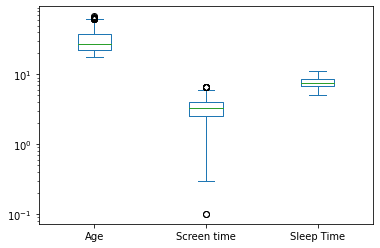

In [8]:
# checking for outliers in the dataset
df.plot(kind='box');
plt.semilogy();
#no outliers in the dataset

In [9]:
df.describe()

,Age,Screen time,Sleep Time
count,938.000000,938.000000,938.000000
mean,31.359275,3.217143,7.607409
std,12.614467,1.050222,1.106670
min,18.000000,0.100000,5.000000
25%,22.000000,2.500000,6.750000
50%,27.000000,3.250000,7.500000
75%,38.000000,4.000000,8.500000
max,68.000000,6.500000,11.000000


# DATA ANALYSIS AND VISUALIZATION


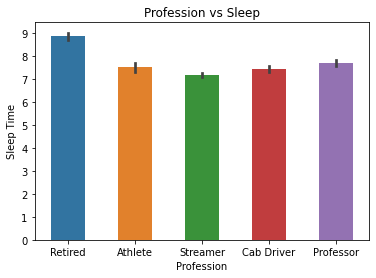

In [10]:
#first we plot graph between profession and screen time
fig, ax = plt.subplots()
sns.barplot(x=df["Profession"],y=df["Sleep Time"])
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
plt.yticks(list(range(0,10)))
change_width(ax, .50)
plt.title("Profession vs Sleep")
plt.savefig('sleep time vs profession.jpg',bbox_inches='tight')

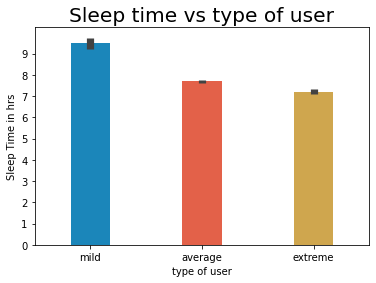

In [11]:
# now we plot graph between time of user and sleep time
fig, ax = plt.subplots()
plt.style.use("fivethirtyeight")
sns.barplot(x=df["type of user"],y=df["Sleep Time"])
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
plt.yticks(list(range(0,10)))
change_width(ax, .35)
plt.title("Sleep time vs type of user")
plt.ylabel("Sleep Time in hrs")
plt.savefig('sleep time vs type of user1.jpg',bbox_inches='tight')

In [12]:
#now we check sleeptime in weekdays and weekends
c=df.groupby("day")["Sleep Time"].mean()
c=c.reset_index()

c

,day,Sleep Time
0,Weekdays,7.201927
1,Weekend,7.967203


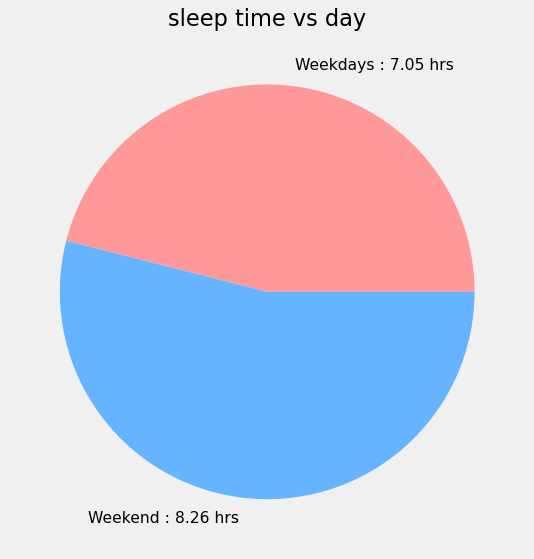

In [13]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
figure(figsize=(15,8),dpi=80)
plt.pie([7.0512,8.26365],labels=['Weekdays : 7.05 hrs','Weekend : 8.26 hrs'],colors=colors)
plt.title("sleep time vs day")
plt.savefig('age ground Vs sleep Time vs Day.jpg',bbox_inches='tight')

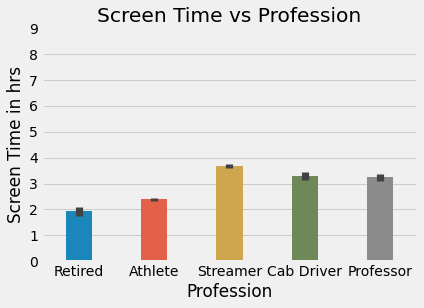

In [14]:
#we check how is the usage of twitter for different profession
fig, ax = plt.subplots()
plt.style.use("fivethirtyeight")
sns.barplot(x=df["Profession"],y=df["Screen time"])
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
plt.yticks(list(range(0,10)))
change_width(ax, .35)
plt.title("Screen Time vs Profession")
plt.ylabel("Screen Time in hrs")
plt.savefig('Screen Time vs age group.jpg',bbox_inches='tight')

In [15]:
#now we plot graph of different profession and their sleep time in weekdays and weekends
wen=df[df.day=='Weekend']
wdy=df[df.day=='Weekdays']

wend=wen.groupby("Profession")["Sleep Time"].mean()
wend=wend.reset_index()

wdys=wdy.groupby("Profession")["Sleep Time"].mean()
wdys=wdy.reset_index()

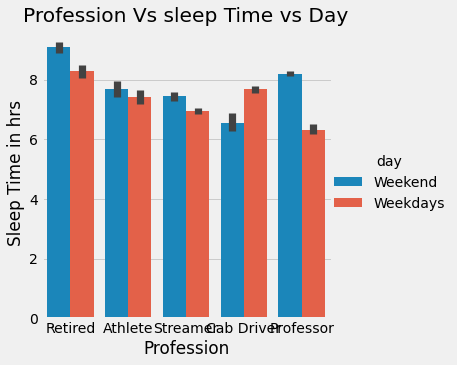

In [16]:
plt.style.use("fivethirtyeight")
sns.catplot(x = 'Profession', y='Sleep Time', 
           hue = 'day',data=df, kind='bar')
plt.title("Profession Vs sleep Time vs Day")
plt.ylabel("Sleep Time in hrs")

plt.savefig('Profession Vs sleep Time vs Day.jpg',bbox_inches='tight')

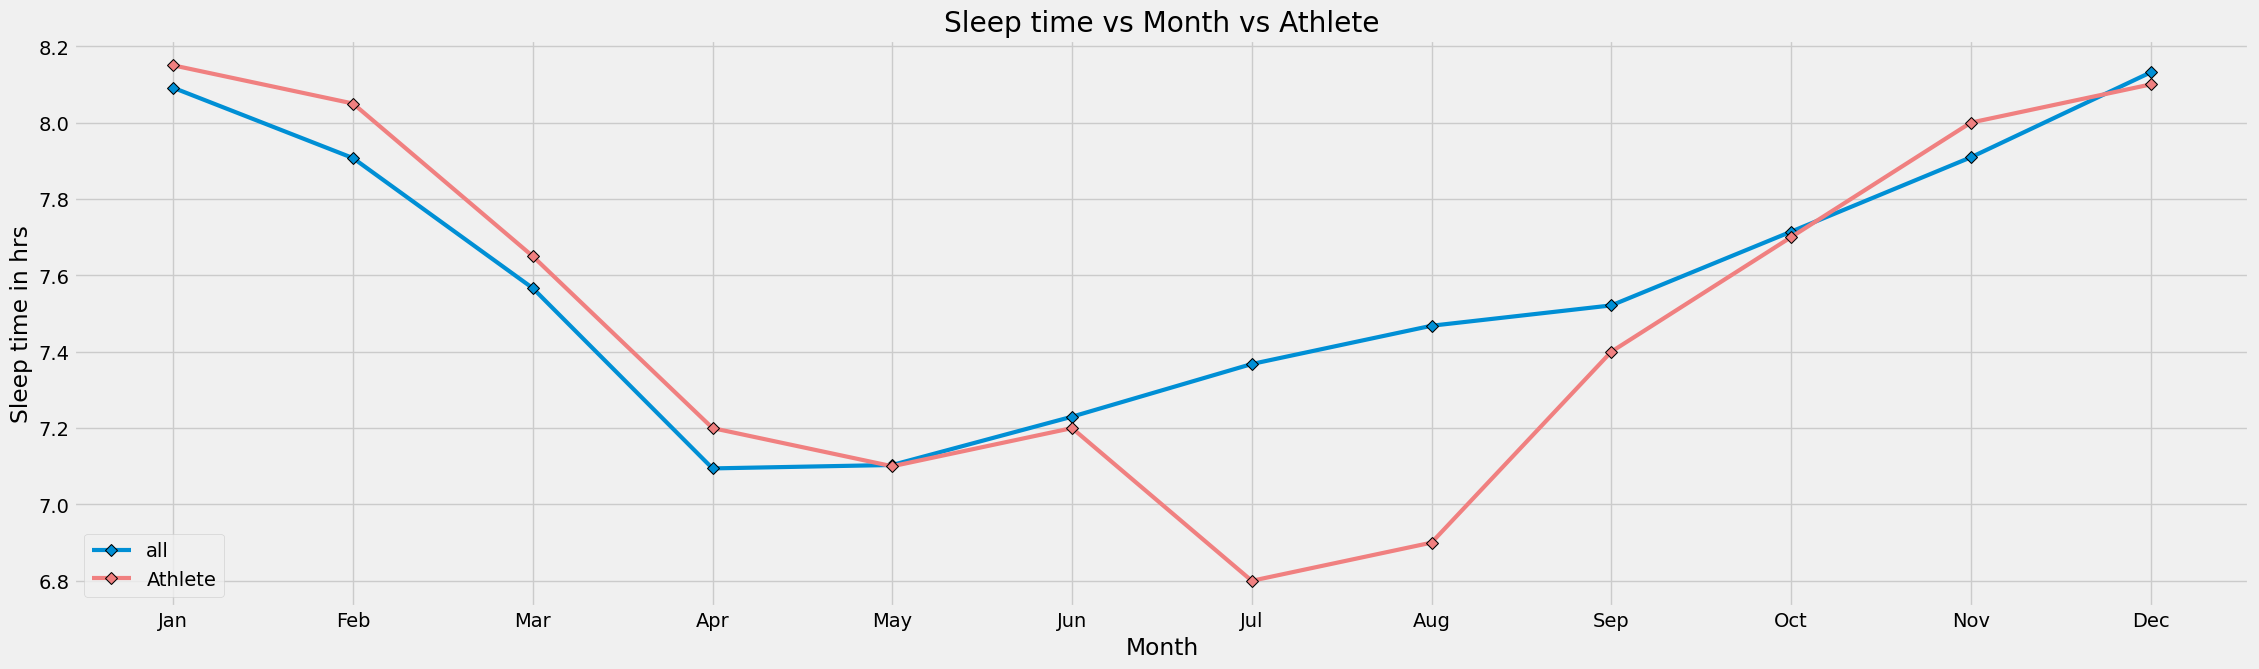

In [17]:
#now we check how is the sleep time during the whole year and also compare it with athlete
b=df.groupby("Month")["Sleep Time"].mean()
b=b.reset_index()
b
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
b.index=pd.CategoricalIndex(b['Month'],categories=sort_order,ordered=True)
b=b.sort_index().reset_index(drop=True)
b

a1=df[df.Profession=='Athlete']
a1
a11=a1.groupby("Month")["Sleep Time"].mean()
a11=a11.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a11.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a11=a11.sort_index().reset_index(drop=True)
a11
import seaborn as sns

figure(figsize=(25,7),dpi=100)
sns.lineplot(x='Month',y='Sleep Time',data=b,label="all",marker='D',linewidth=3,markeredgecolor='black')
sns.lineplot(x='Month',y='Sleep Time',data=a11,label="Athlete",color='lightcoral', marker='D', markeredgecolor='black',linewidth=3)
plt.ylabel("Sleep time in hrs")
#plt.savefig('STvsMonths.jpg')
plt.title("Sleep time vs Month vs Athlete")
plt.savefig('sleep time vs Month1.jpg',bbox_inches='tight')

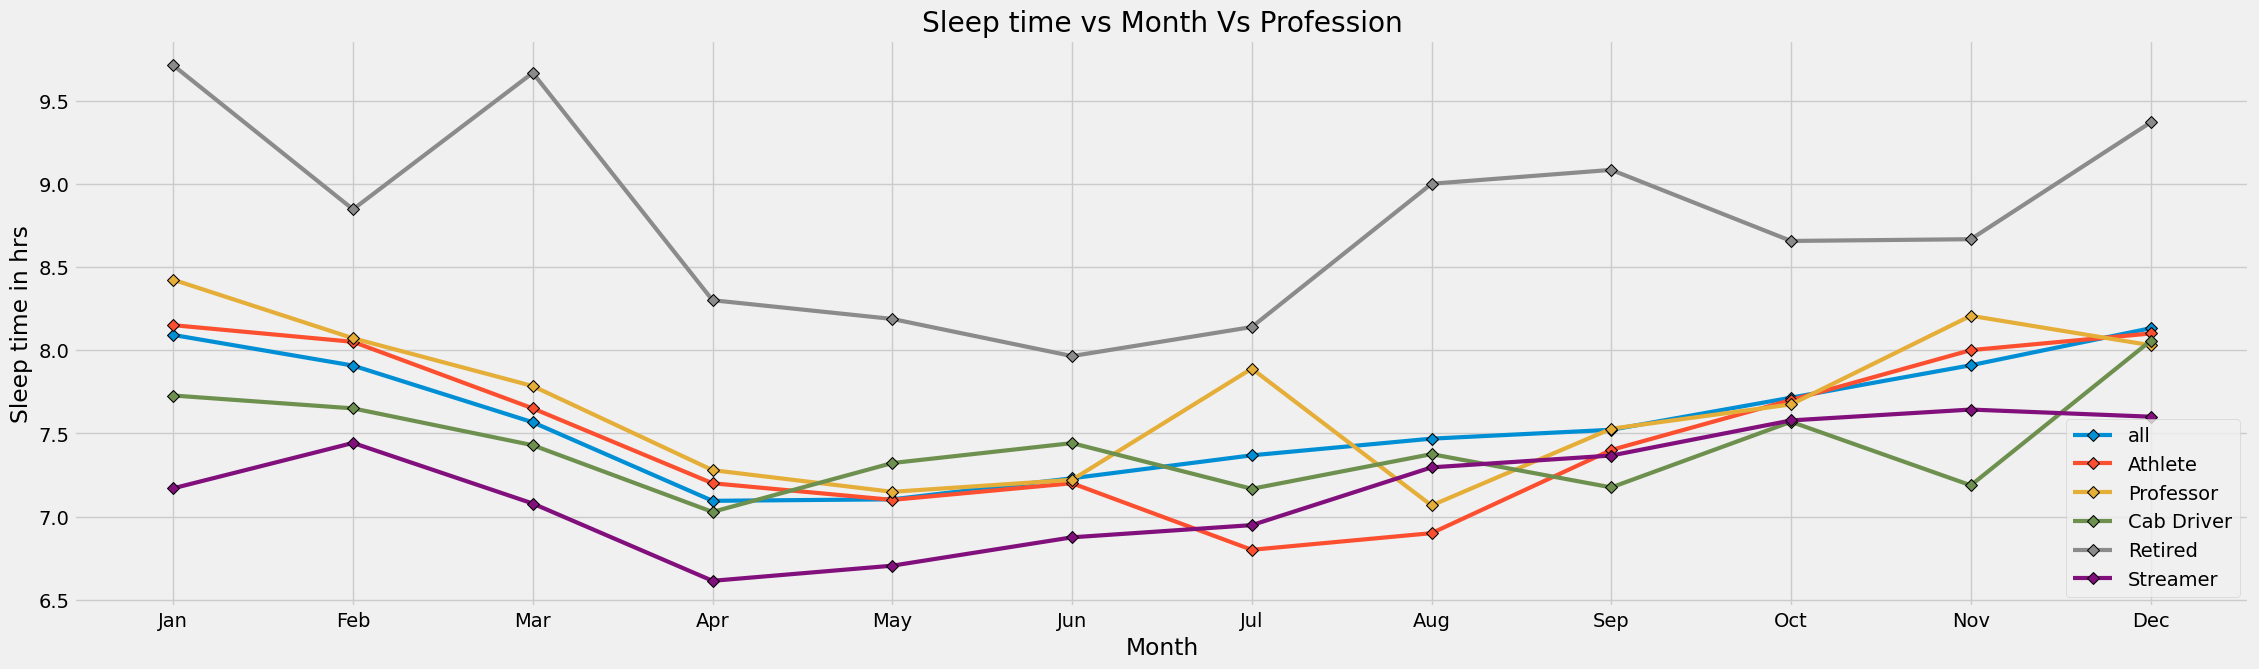

In [18]:
a2=df[df.Profession=='Professor']
a3=df[df.Profession=='Cab Driver']
a4=df[df.Profession=='Retired']
a5=df[df.Profession=='Streamer']



a22=a2.groupby("Month")["Sleep Time"].mean()
a22=a22.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a22.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a22=a22.sort_index().reset_index(drop=True)
a22

a33=a3.groupby("Month")["Sleep Time"].mean()
a33=a33.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a33.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a33=a33.sort_index().reset_index(drop=True)
a33
a44=a4.groupby("Month")["Sleep Time"].mean()
a44=a44.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a44.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a44=a44.sort_index().reset_index(drop=True)
a44

a55=a5.groupby("Month")["Sleep Time"].mean()
a55=a55.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a55.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a55=a55.sort_index().reset_index(drop=True)
a55
import seaborn as sns
figure(figsize=(25,7),dpi=100)
sns.lineplot(x='Month',y='Sleep Time',data=b,marker='D',linewidth=3,markeredgecolor='black',label="all")
sns.lineplot(x='Month',y='Sleep Time',data=a11,marker='D',linewidth=3,markeredgecolor='black',label="Athlete")
sns.lineplot(x='Month',y='Sleep Time',data=a22,marker='D',linewidth=3,markeredgecolor='black',label="Professor")
sns.lineplot(x='Month',y='Sleep Time',data=a33,marker='D',linewidth=3,markeredgecolor='black',label="Cab Driver")
sns.lineplot(x='Month',y='Sleep Time',data=a44,marker='D',linewidth=3,markeredgecolor='black',label="Retired")
sns.lineplot(x='Month',y='Sleep Time',data=a55,marker='D',linewidth=3,markeredgecolor='black',label="Streamer")
plt.ylabel("Sleep time in hrs")

plt.savefig('STvsMonths.jpg')
plt.title("Sleep time vs Month Vs Profession")
plt.savefig('sleep time vs Month.jpg',bbox_inches='tight')

## Logistic regression


In [19]:
df.head()

,Age,Screen time,Sleep Time,day,Profession,Month,type of user
0,59,1.40,9.5,Weekend,Retired,Jul,average
1,22,2.50,8.0,Weekend,Athlete,Nov,average
2,23,4.25,6.0,Weekdays,Streamer,Apr,extreme
3,28,3.25,7.5,Weekdays,Cab Driver,Nov,average
4,56,2.80,8.0,Weekdays,Retired,Nov,average


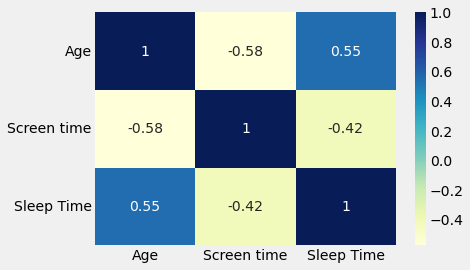

<Figure size 432x288 with 0 Axes>

In [20]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()
plt.savefig('heat map.jpg',bbox_inches='tight')

In [21]:
X = df[['Age','Screen time']]
X.head()

,Age,Screen time
0,59,1.40
1,22,2.50
2,23,4.25
3,28,3.25
4,56,2.80


In [22]:
X.shape

(938, 2)

In [23]:
from sklearn.preprocessing import LabelEncoder
labels = df['Profession']

# Label encoding for the categorical data 
le = LabelEncoder()
y = le.fit_transform(labels)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
ypred=logreg.predict(X_test)
ypred

array([2, 2, 4, 3, 4, 4, 4, 2, 2, 3, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 3,
       4, 4, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 4, 3, 4, 1, 3, 4, 4, 1, 2, 2,
       2, 3, 2, 2, 1, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 3, 4, 3, 4, 3,
       2, 2, 4, 4, 2, 2, 3, 2, 4, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 4, 3, 2, 2, 2, 4, 2, 2, 2, 4, 3, 4, 4, 2, 3, 4, 3, 2, 4, 3, 2,
       2, 4, 4, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 0, 4, 4, 3, 3, 4, 4, 4,
       2, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 2, 3, 2, 4, 4, 2, 4, 4, 2, 2, 3,
       2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 3, 4, 2, 2, 2, 2, 3, 4, 2, 2, 2, 4,
       4, 2, 3, 4, 2, 2, 3, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 2, 4, 3, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 3, 4, 3, 4, 3, 2, 4, 2, 2, 3, 2,
       4, 2, 2, 4, 2, 3, 4, 2, 2, 2, 4, 2, 3, 4, 2, 4, 2, 2])

In [27]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(ypred, y_test)))

Accuracy of logistic regression classifier on test set: 0.69


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix = confusion_matrix(ypred,y_test)
print(confusion_matrix)

[[ 0  0  1  0  0]
 [ 0  3  0  1  0]
 [ 0 57 80  2  6]
 [ 1  6  2 29  0]
 [ 6  1  4  0 83]]


In [30]:
df["Profession"].value_counts()

Streamer      334
Professor     275
Cab Driver    186
Retired       119
Athlete        24
Name: Profession, dtype: int64

 # Modifications

In [38]:
#we will categorize age into 3 groups
bins= [18,35,55,80]
labels = ['young','middle age','old']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

,Age,Screen time,Sleep Time,day,Profession,Month,type of user,age group,age_group
0,59,1.40,9.5,Weekend,Retired,Jul,average,old,old
1,22,2.50,8.0,Weekend,Athlete,Nov,average,young,young
2,23,4.25,6.0,Weekdays,Streamer,Apr,extreme,young,young
3,28,3.25,7.5,Weekdays,Cab Driver,Nov,average,young,young
4,56,2.80,8.0,Weekdays,Retired,Nov,average,old,old


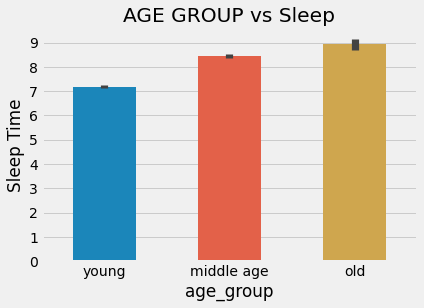

In [39]:
#first we plot graph between profession and screen time
fig, ax = plt.subplots()
sns.barplot(x=df["age_group"],y=df["Sleep Time"])
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
plt.yticks(list(range(0,10)))
change_width(ax, .50)
plt.title("AGE GROUP vs Sleep")
plt.savefig('sleep time vs profession.jpg',bbox_inches='tight')

In [ ]:
wen=df[df.day=='Weekend']
wdy=df[df.day=='Weekdays']

wend=wen.groupby("age_group")["Sleep Time"].mean()
wend=wend.reset_index()

wdys=wdy.groupby("age_group")["Sleep Time"].mean()
wdys=wdy.reset_index()

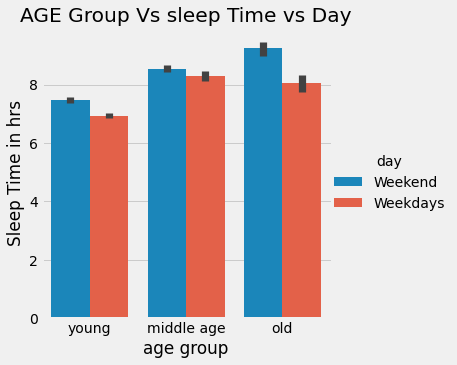

In [34]:
plt.style.use("fivethirtyeight")
sns.catplot(x = 'age_group', y='Sleep Time', 
           hue = 'day',data=df, kind='bar')
plt.title("AGE Group Vs sleep Time vs Day")
plt.ylabel("Sleep Time in hrs")

plt.savefig('AGE GROUP Vs sleep Time vs Day.jpg',bbox_inches='tight')

# inference
## We can see that there is no much difference in sleeping time of middle age group 


In [44]:
b=df.groupby("Month")["Sleep Time"].mean()
b=b.reset_index()
b
a2=df[df.age_group=='young']
a3=df[df.age_group=='middle age']
a4=df[df.age_group=='old']




a22=a2.groupby("Month")["Sleep Time"].mean()
a22=a22.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a22.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a22=a22.sort_index().reset_index(drop=True)
a22

a33=a3.groupby("Month")["Sleep Time"].mean()
a33=a33.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a33.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a33=a33.sort_index().reset_index(drop=True)
a33
a44=a4.groupby("Month")["Sleep Time"].mean()
a44=a44.reset_index()
sort_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
a44.index=pd.CategoricalIndex(a11['Month'],categories=sort_order,ordered=True)
a44

,Month,Sleep Time
Month,,
Jan,Apr,7.666667
Feb,Aug,9.142857
Mar,Dec,9.388889
Apr,Feb,8.937500
May,Jan,9.750000
Jun,Jul,7.977778
Jul,Jun,7.416667
Aug,Mar,9.700000
Sep,May,7.920000


<AxesSubplot:xlabel='Month', ylabel='Sleep Time'>

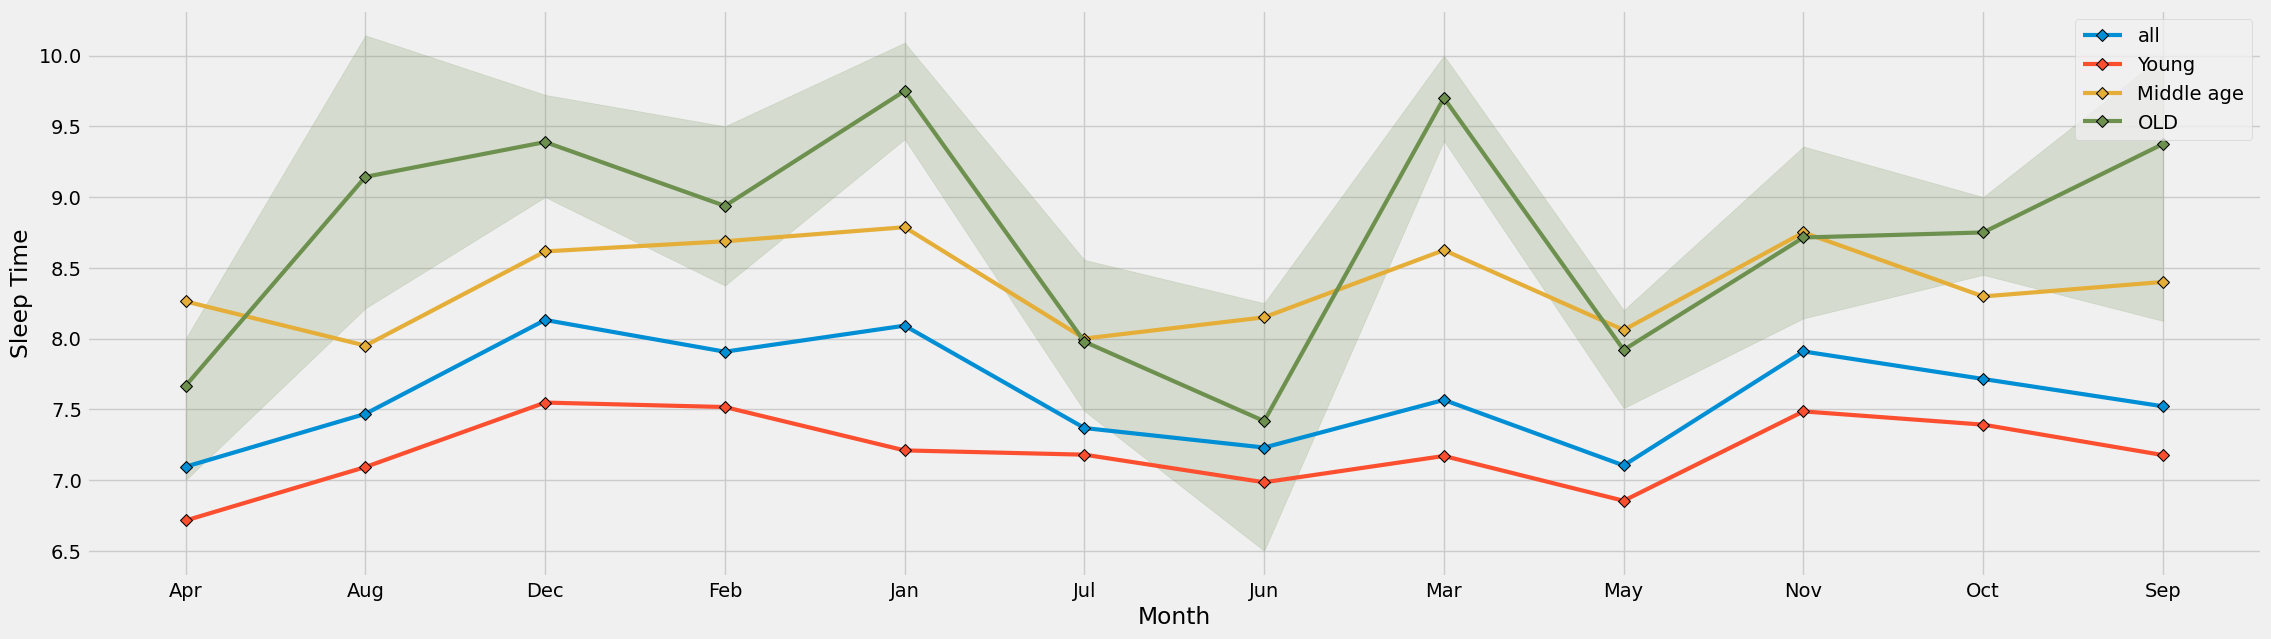

In [43]:
import seaborn as sns
figure(figsize=(25,7),dpi=100)
sns.lineplot(x='Month',y='Sleep Time',data=b,marker='D',linewidth=3,markeredgecolor='black',label="all")
sns.lineplot(x='Month',y='Sleep Time',data=a22,marker='D',linewidth=3,markeredgecolor='black',label="Young")
sns.lineplot(x='Month',y='Sleep Time',data=a33,marker='D',linewidth=3,markeredgecolor='black',label="Middle age")
sns.lineplot(x='Month',y='Sleep Time',data=a44,marker='D',linewidth=3,markeredgecolor='black',label="OLD")